**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Good luck on the next sprint!

# Analysis of Taxi Rides in Chicago, IL

We will be analyzing data of different taxi companies in the Chicago area to determine trends to increase performance of the new ride-share company Zuber. Ride preference in relation to company popularity and location will be looked at along with the impact of weather on demand.

### Loading Libraries and Data

#### Importing Libraries

In [2]:
# Importing libraries for preprocessing and analysis
import pandas as pd #importing the pandas library
from matplotlib import pyplot as plt #importing Matplotlib's pyplot library
import numpy as np #importing the numpy library
from math import factorial #importing factorial for math library
from scipy import stats as st #importing stats from scipy

#### Importing Data

In [16]:
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
location_df = pd.read_csv('/datasets/project_sql_result_04.csv')
loop_ohare_df = pd.read_csv('/datasets/project_sql_result_07.csv')

### Overview of Data

#### company_df Overview

In [5]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [14]:
company_df.isna().sum() # Verifying no missing values

company_name    0
trips_amount    0
dtype: int64

For `company_df` the data types are correct for each column, and there are no missing values as the index ranges from 0-63, meaning there are a total of 64 entries per column, and our `.info()` method has shown 64 non-null values for both categories. This is verified by the `.isna().sum()` method.

#### location_df Overview

In [8]:
location_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [9]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [15]:
location_df.isna().sum() # Verifying no missing values

dropoff_location_name    0
average_trips            0
dtype: int64

For `location_df` the data types are correct for each column, and there are no missing values as the index ranges from 0-93, meaning there are a total of 94 values per column, and our `.info()` method has shown 94 non-null values for both categories. This is verified by the `.isna().sum()` method.

#### loop_ohare_df Overview

In [17]:
loop_ohare_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [18]:
loop_ohare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [24]:
loop_ohare_df['start_ts'] = pd.to_datetime(loop_ohare_df['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [25]:
loop_ohare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [26]:
loop_ohare_df.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

For `loop_ohare_df` the data types are correct for each column after `start_ts` was converted to datetime data type. There are no missing values as the index ranges from 0-1067, meaning there are a total of 1068 values per column, and our `.info()` method has shown 94 non-null values for both categories. This is verified by the `.isna().sum()` method.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

### Exploratory Analysis

#### Number of rides per Taxi Company

In [46]:
eda1 = company_df.query("trips_amount > 547")

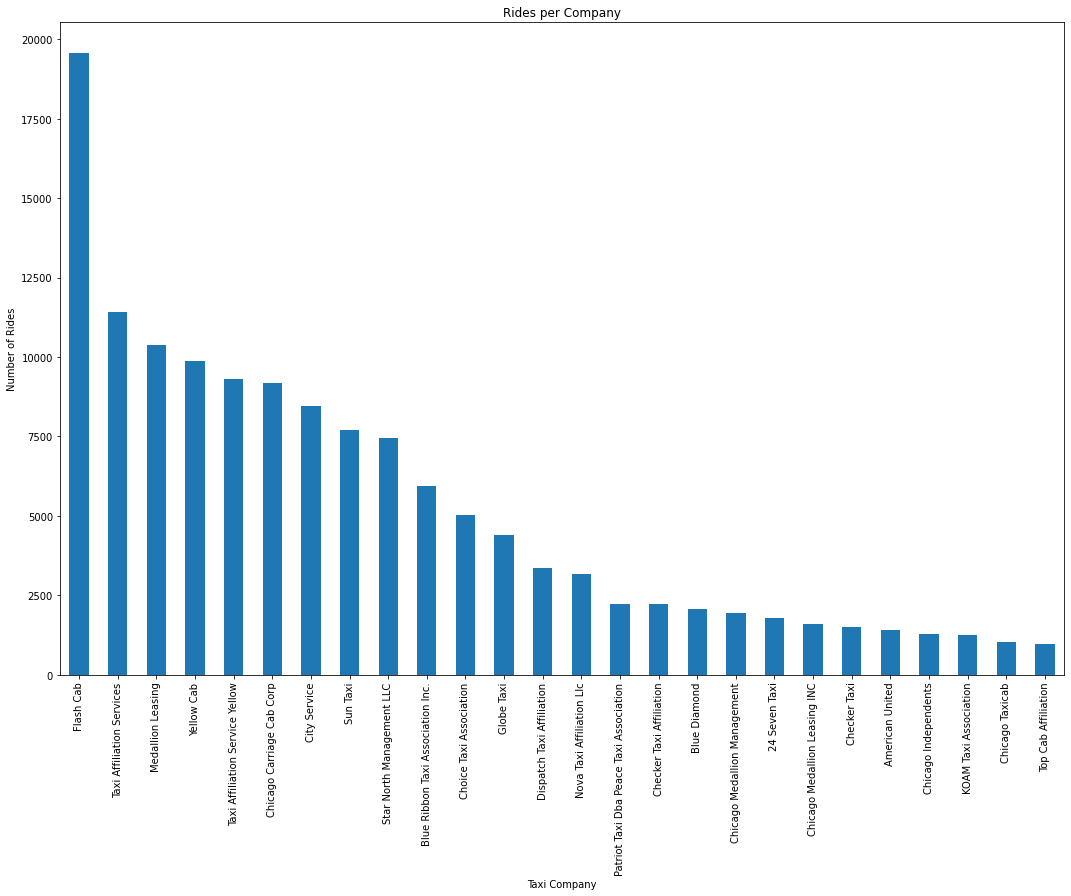

In [47]:
eda1.plot(kind='bar',
          x='company_name',
          stacked=True,
          title='Rides per Company',
          xlabel='Taxi Company',
          ylabel='Number of Rides',
          figsize=[18,12],
          legend=False
         )

plt.show()

The leading taxi company, Flash Cab, holds the first place position by a sizeable margin, those following decrease from approximately 11,500 rides to approximately 2500 rides in the 15th most popular taxi company at a relatively even pace. From the 15th position onward, the decline in activity is slower between companies. The cut-off for companies shown was at 547 rides, which represents approximately 1.5 rides per day on average over a year. The goal of Zuber should be to make it into the top 15 at the very least, which would take approximately 3000 rides, over a year the inital goal would be approximately 8.2 rides per day. Once the top 15 company threshold is met, further steps should be taken to improve business further and aim to become on par with Flash Cab in trips made.

#### Top 10 Neighborhoods by Dropoffs

 - identify the top 10 neighborhoods in terms of drop-offs

In [28]:
display(location_df.sort_values(by='average_trips', ascending=False).head(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [39]:
eda2 = location_df.sort_values(by='average_trips', ascending=False).head(10)

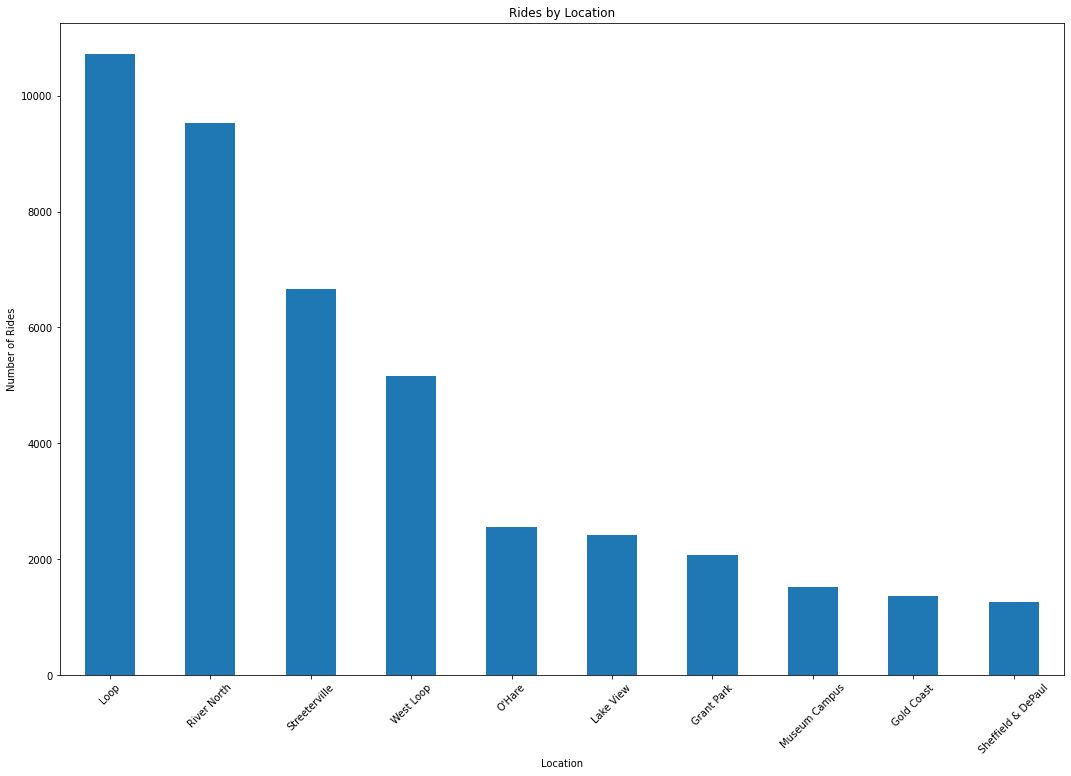

In [45]:
eda2.plot(kind='bar',
          x='dropoff_location_name',
          stacked=True,
          title='Rides by Location',
          xlabel='Location',
          ylabel='Number of Rides',
          figsize=[18,12],
          legend=False
         )

plt.xticks(rotation = 45)
plt.show()

The highest frequented location is the Loop with approximately 11,000 rides. The next three, being River North, Streeterville, and West Loop all have respectable trips made. The last six locations all represent approximately 2,5000 rides or fewer. This is not to say that these regions could not be profitable, as the 5th highest is O'Hare which contains the international airport, but the focus should be on those areas that can generate the most profit quickly for Zuber.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully!

</div>

### Statistical Analysis

Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

- Decide where to set the significance level (alpha) on your own.

Explain:
 - how you formed the null and alternative hypotheses
 - what criterion you used to test the hypotheses and why

***Null Hypothesis*** = The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

***Alternate Hypothesis*** = The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The null and alternative hypotheses were formulated correctly

</div>

In [48]:
loop_ohare_df['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [54]:
sda_good = loop_ohare_df.query("weather_conditions == 'Good'")[['duration_seconds']]
sda_bad = loop_ohare_df.query("weather_conditions == 'Bad'")[['duration_seconds']]

In [58]:
results = st.ttest_ind(sda_good, sda_bad)

alpha = 0.01

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  [6.51797033e-12]
We reject the null hypothesis


***Conclusion***

The null hypothesis of "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays." which represents no difference between the samples of trips made in good and bad weather is rejected in favor of the alternate hypothesis of "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." The significance level, or alpha, was set at 1%, being that there are constants - the day of the week, and the pick-up and drop-off regions - the only substantial difference between the two data samples is the weather, so a lower significance level allowed is logical to use for this analysis.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The test was conducted correctly, and the conclusion is consistent with test results

</div>

### Conclusion

Having analyzed data of taxi companies in Chicago, the first goal for Zuber should be to focus on cultivating business to get into the same range as the top 15 cab companies. The threshold for this is approximately 8.2 rides per day on average for a yearly period, which is approximately 3000 in total over the span of the year. To attain this goal, the regions that should be focused on are the Loop, River North, Streeterville, and West Loop which represtent the top four regions. It should be noted that the weather will likely affect business as well, so overall business could be impacted by unknown factors. 

Once the threshold of matching the business of the top 15 taxi services is met, further expansion and marketing is recommended to try and match if not replace Flash Cab as the top ride service in Chicago. This would mean focusing on accessibility for customers to be able to get a ride easily along with further analysis into what weather affects business to help predict days that will require more or less cars for ride-share.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>